<a href="https://colab.research.google.com/github/tejb96/ml-nonlinear-models/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Tejpreet Bal

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [ ]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [ ]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

DT = DecisionTreeRegressor(max_depth=5, random_state=0)
DT.fit(X, y)

RF = RandomForestRegressor(max_depth=5,max_features='log2',n_estimators=50,random_state=0)
RF.fit(X, y)

GB = GradientBoostingRegressor(max_depth=5,n_estimators=50,learning_rate=0.01,random_state=0)
GB.fit(X, y)

result={'training_score':{},'validation_score':{}}
datasets=[ (X, y, DT),(X, y, RF), (X, y, GB)]

for X_data, y_data, model in datasets:
    scores = cross_validate(model, X_data, y_data, cv=5,
                        scoring='neg_mean_squared_error',
                       return_train_score=True)
    train_score=-scores['train_score'].mean()
    test_score=-scores['test_score'].mean()
    result['training_score'][str(model)]=train_score
    result['validation_score'][str(model)]=test_score

results=pd.DataFrame(data=result)
results.head()

,training_score,validation_score
"DecisionTreeRegressor(max_depth=5, random_state=0)",47.918561,163.087775
"RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=50,\n random_state=0)",37.486629,133.418746
"GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=50,\n random_state=0)",126.704953,195.065275


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [ ]:
# TO DO: ADD YOUR CODE HERE
result={'training_score':{},'validation_score':{}}
datasets=[ (X, y, DT),(X, y, RF), (X, y, GB)]

for X_data, y_data, model in datasets:
    scores = cross_validate(model, X_data, y_data, cv=5,
                        scoring='r2',
                       return_train_score=True)
    train_score=scores['train_score'].mean()
    test_score=scores['test_score'].mean()
    result['training_score'][str(model)]=train_score
    result['validation_score'][str(model)]=test_score

results=pd.DataFrame(data=result)
results.head()

,training_score,validation_score
"DecisionTreeRegressor(max_depth=5, random_state=0)",0.822887,0.176210
"RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=50,\n random_state=0)",0.861670,0.316878
"GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=50,\n random_state=0)",0.539213,0.136018


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. The mean squared error (MSE) for the training score for DT was the lowest at 47.918561, for RF it was 37.486629, and for GB it was approximately 126.704953. MSE for validation score was much greater at 163.087775, 133.418746, and 195.065275 for DT, RF, and GB respectively. For the linear model the MSE was 111, and 96 for training and validation. The difference between training and validation scores for the models in this assignment for both MSE and r2 seem to suggest that these models could be overfitting.  

2. I would select the linear regression model from the last assignment since it produced much better results.

3. The accuracy of the tree-based models can be improved by adjusting the parameters associated with the model to prevent overfitting. For example, for the DT model max_depth,max_leaf_nodes, or min_samples_leaf can be adjusted. For RF and GB models, max_depth, and n_estimators can be adjusted.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I used the example codes provided for decisontrees on D2L.
2. I completed the steps in order.  
3. I asked AI how to reduce overfitting for the decision tree models and it gave me a bunch of parameters that I could potentially adjust. I did end up modifying the code just to see if I can get better results but wasn't able to.
4. The instructions provided in the steps were helpful. For example in step 4, it specified to use the cross_val_score function with score=neg_mean_squared_error.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [ ]:
# TO DO: Import wine dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets
y = y['class']
# # metadata
# print(wine.metadata)

# # variable information
# print(wine.variables)

print("X size =",X.size, "y size= ", y.size, "X types: ", type(X), "y types: ", type(y),y.dtypes)


X size = 2314 y size=  178 X types:  <class 'pandas.core.frame.DataFrame'> y types:  <class 'pandas.core.series.Series'> int64


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [ ]:
# TO DO: ADD YOUR CODE HERE
X.head()


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [ ]:
# TO DO: ADD YOUR CODE HERE
print(X.isnull().sum())

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64


How many samples do we have of each type of wine?

In [ ]:
# TO DO: ADD YOUR CODE HERE
y.value_counts()


class
2    71
1    59
3    48
Name: count, dtype: int64

### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [ ]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    X,y,  random_state=0)

tree = DecisionTreeClassifier(max_depth=3,random_state=0)
tree.fit(X_train, y_train)

svc = SVC()
svc.fit(X_train, y_train)

result={'training_score':{},'validation_score':{}}
datasets=[ (X_train, y_train, tree),(X_train, y_train, svc)]

for X_data, y_data, model in datasets:
    scores = cross_validate(model, X_data, y_data, cv=5,
                        scoring='accuracy',
                       return_train_score=True)
    train_score=scores['train_score'].mean()
    test_score=scores['test_score'].mean()
    result['training_score'][str(model)]=train_score
    result['validation_score'][str(model)]=test_score

results=pd.DataFrame(data=result)
results.head()


,training_score,validation_score
"DecisionTreeClassifier(max_depth=3, random_state=0)",0.994357,0.894017
SVC(),0.680427,0.676638


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [ ]:
# TO DO: Implement best model
# DecisionTreeClassifier was the best model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_dt = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)


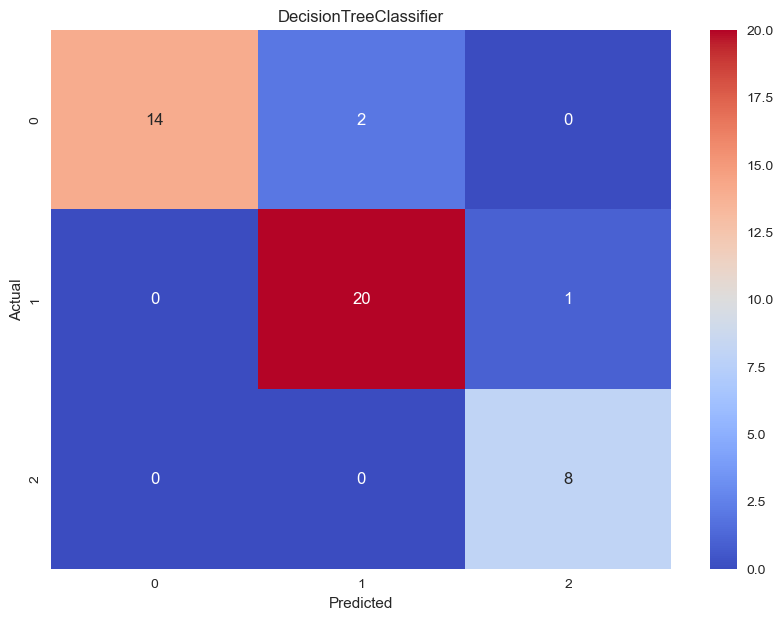

In [ ]:
# TO DO: Print confusion matrix using a heatmap
fig, ax = plt.subplots(1, figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='coolwarm')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('DecisionTreeClassifier')
plt.show()

In [ ]:
# TO DO: Print classification report
acc = accuracy_score(y_test, y_pred_dt)
classification_repo = classification_report(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)


print("Accuracy:", acc)
print("Classification Report:\n", classification_repo)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45

Confusion Matrix:
 [[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. DTC had a training score of 0.99, and a validation score of 0.89. SVC had a scores of 0.68 and 0.68 for traning anc validation scores respectively. DTC did much better than the svc model.

2. one of the reasons is because the default kernel is used. When the kernel is set to linear, validation score for SVC is  0.96, which is better than the DTC model.

The second reason is that the data was not preprocessed, and the parameters were not tuned.

3. Only 3 samples were incorrectly categorized using the DTC model.

4. It depends on what the model is being used for. If the model is being used to classify wine samples into these 3 classes for quality purposes, maximizing precision would be better to decrease false positives. If the goal is to maximize profits, then recall should be improved to ensure all positives are captured.



### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I used the example codes provided from lectures, and the lab solutions to complete this assignment.
2. I completely the steps in order, and had to revisit a few steps to make corrects.
3. I read in the slides that it is possible to change the kernel to improve accuracy, so I asked AI:
"is this linear from sklearn.svm import SVC"
It told me to use: svc_linear = SVC(kernel='linear'). I tried it and got a validation score of 0.96.
4. I used the pip install method for the data as mentioned on the data website, and I kept getting an error for my target variable y which suggested I should use the .ravel() function. It did not work so I looked the error up, and realized it was because y was a pd.dataframe and not pd.series.
The source used to fix error: https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected



## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

For part 1, it says that DT, and GB dont seem to perform well when the parameters are not tuned properly in the slides, which seems to be the case. It also says that the RF model does not fit well to sparse data and the data contains many 0's.

In the slides, it says that decision trees work well when you have features on a completely different scale, which for this data the features are. They seem to overfit easily which can be seen by slight adjustment of the max_depth to 5, which results in training score to increase to 1, and the validation score does not change. The doenside of the SVC discussed in the lecture slides is, that they require preprocessing of data and careful choice of the parameters. This can be seen from the substantial increase in the validation score from 0.68 to 0.96 just by changing the kernal from default to linear.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I disliked the results I got for part 1, the validation scores for the trees are very low. I found it interested how well the SVC model fit the data when kernel was set to linear.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [ ]:
# TO DO: ADD YOUR CODE HERE
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(max_iter=5000,dual='auto')
lin_svc.fit(X_train, y_train)
scores = cross_validate(lin_svc, X_train, y_train, cv=5,
                        scoring='accuracy',
                       return_train_score=True)
print("Training Score:", scores['train_score'].mean())
print("Testing Score:", scores['test_score'].mean())


Training Score: 0.9924704637630046
Testing Score: 0.9772079772079773


*ANSWER HERE*

LinearSVC is an execellent fit for this data since the test score is high, and the difference between test and training scores is not much.